# Readmission Prediction
## Zhenda Xie

In [1]:
import csv
import scipy
import sklearn
import xgboost as xgb
import numpy as np
import pandas as pd
import mxnet as mx
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./data/diabetic_data.csv')

## Data Statistics & Cleaning
### Drop Useless Data

In [3]:
drop_data = data.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code'], axis=1)

### Drop Meaningless Data

In [ ]:
# Todo

### Clean Data Itemized

#### Race

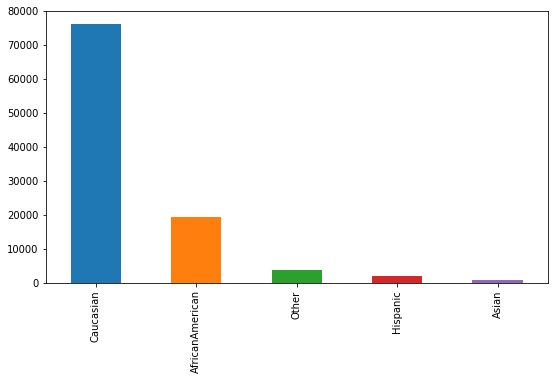

In [5]:
race = drop_data['race']
race = race.replace({'?':'Other'})
drop_data['race'] = race
_ = race.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

#### Gender

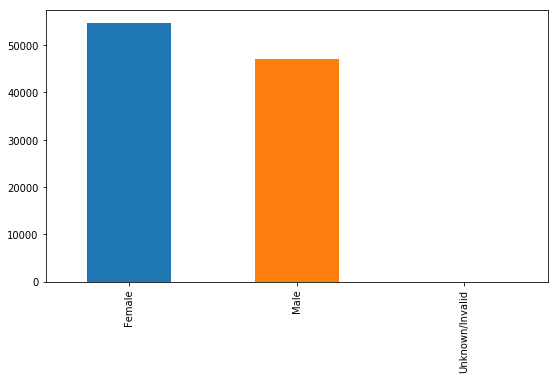

In [105]:
gender = drop_data['gender']
_ = gender.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

#### Age

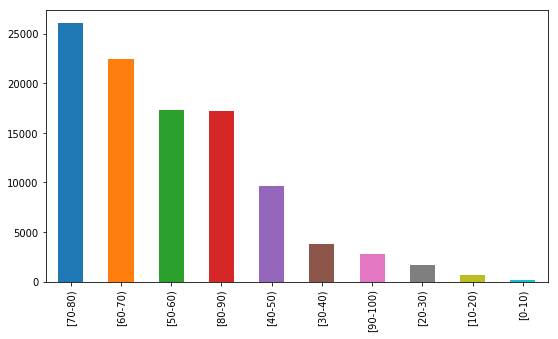

In [104]:
age = drop_data['age']
_ = age.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

#### Admission Type

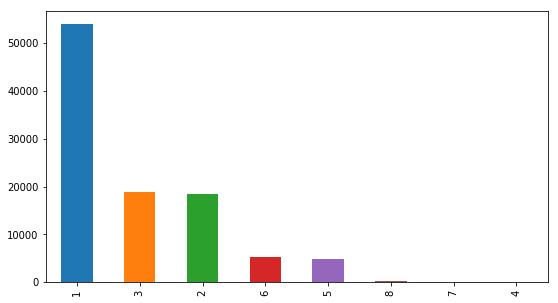

In [103]:
admission_type = drop_data['admission_type_id']
_ = admission_type.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

#### Discharge Disposition

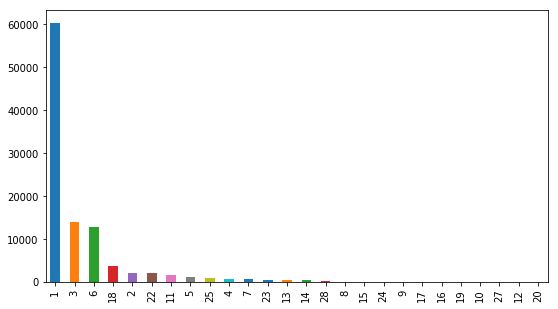

In [102]:
discharge_disposition = drop_data['discharge_disposition_id']
# Processing

# Plot
_ = discharge_disposition.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

#### Admission Source

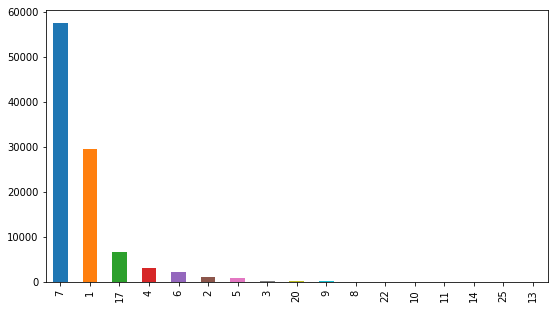

In [101]:
admission_source = drop_data['admission_source_id']
# Processing

# Plot
_ = admission_source.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

#### Time in Hospital

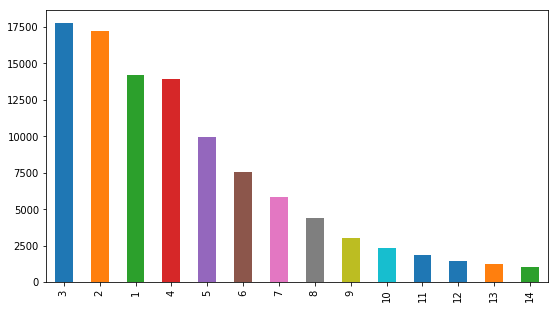

In [96]:
time_in_hospital = drop_data['time_in_hospital']
_ = time_in_hospital.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

#### Medical Specialty

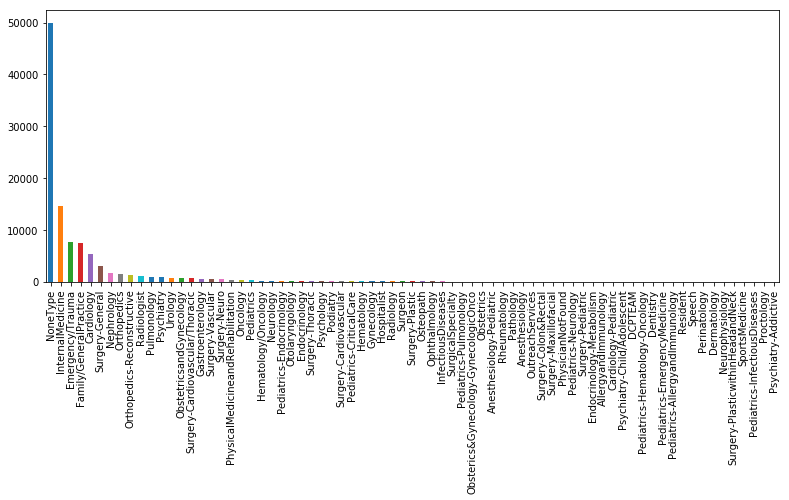

In [97]:
medical_specialty = drop_data['medical_specialty']
medical_specialty = medical_specialty.replace({'?':'NoneType'})
drop_data['medical_specialty'] = medical_specialty
_ = medical_specialty.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

#### Num of Lab Procedures

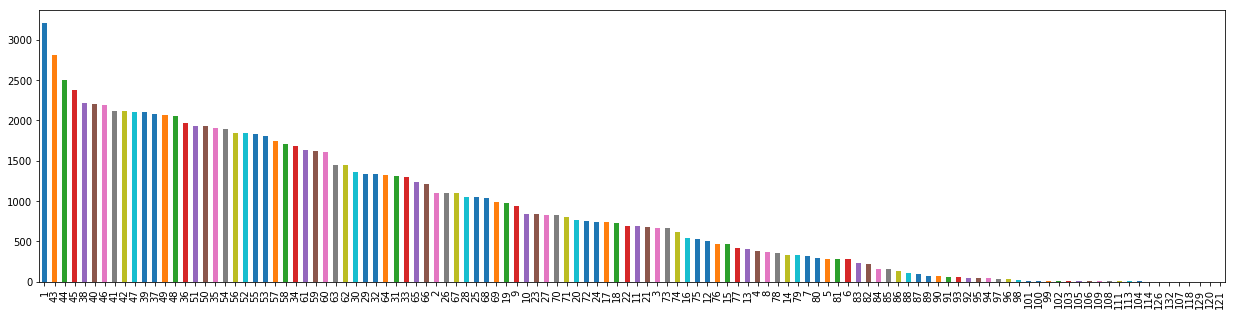

In [98]:
num_lab_procedures = drop_data['num_lab_procedures']
_ = num_lab_procedures.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

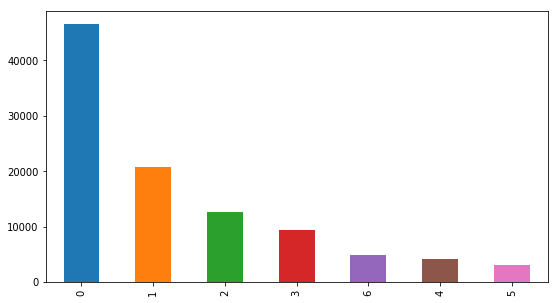

In [99]:
num_procedures = drop_data['num_procedures']
_ = num_procedures.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

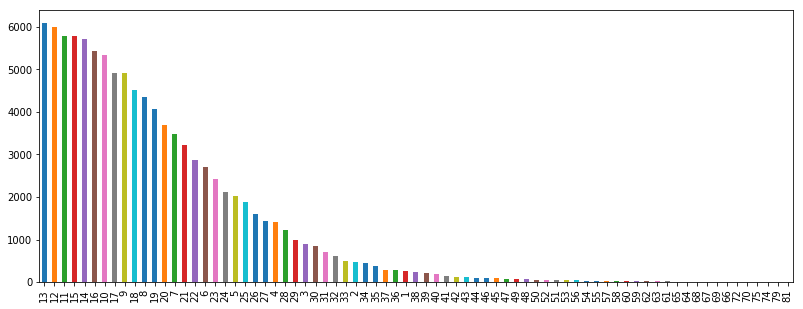

In [100]:
num_medications = drop_data['num_medications']
_ = num_medications.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

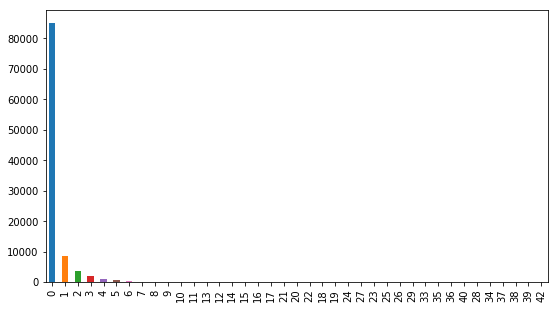

In [108]:
num_outpatient = drop_data['number_outpatient']
_ = num_outpatient.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

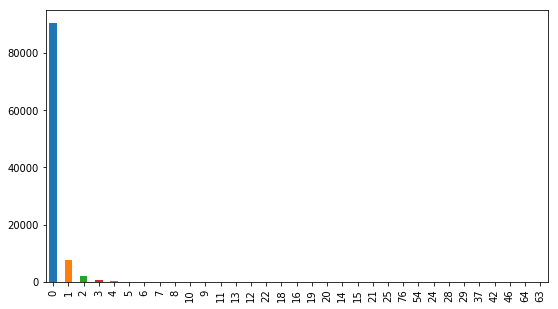

In [110]:
num_emergency = drop_data['number_emergency']
_ = num_emergency.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

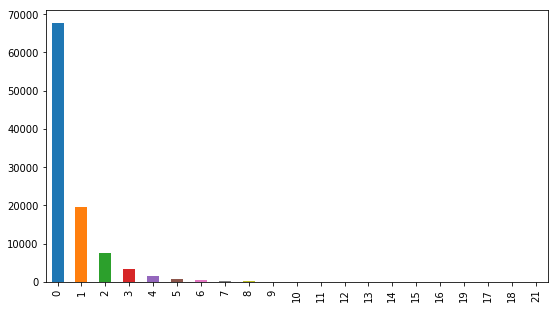

In [112]:
num_inpatient = drop_data['number_inpatient']
_ = num_inpatient.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

#### Diag 1, 2, 3

In [17]:
def clean_diag(diag):
    for idx in range(len(diag)):
        if 'E' in diag[idx] or 'V' in diag[idx]:
            diag[idx] = 'Other_5'
        elif diag[idx].startswith('250.'):
            diag[idx] = 'Diabetes'
        elif diag[idx] == '?':
            diag[idx] = 'NoneType'
        else:
            try:
                check_num = int(diag[idx])
                if (check_num >= 390 and check_num <= 459) or check_num == 785:
                    diag[idx] = 'Circulatory'
                elif (check_num >= 460 and check_num <= 519) or check_num == 786:
                    diag[idx] = 'Respiratory'
                elif (check_num >= 510 and check_num <= 579) or check_num == 787:
                    diag[idx] = 'Digestive'
                elif (check_num >= 800 and check_num <= 999):
                    diag[idx] = 'Injury'
                elif (check_num >= 710 and check_num <= 739):
                    diag[idx] = 'Musculoskeletal'
                elif (check_num >= 580 and check_num <= 629) or check_num == 788:
                    diag[idx] = 'Genitourinary'
                elif (check_num >= 140 and check_num <= 239):
                    diag[idx] = 'Neoplasms'
                elif (check_num >= 790 and check_num <= 799) or check_num == 780 or check_num == 781 or check_num == 784:
                    diag[idx] = 'Other_0'
                elif (check_num >= 240 and check_num <= 279):
                    diag[idx] = 'Other_1'
                elif (check_num >= 680 and check_num <= 709) or check_num == 782:
                    diag[idx] = 'Other_2'
                elif (check_num >= 1 and check_num <= 139):
                    diag[idx] = 'Other_3'
                elif (check_num >= 290 and check_num <= 319):
                    diag[idx] = 'Other_4'
                elif (check_num >= 280 and check_num <= 289):
                    diag[idx] = 'Other_6'
                elif (check_num >= 320 and check_num <= 359):
                    diag[idx] = 'Other_7'
                elif (check_num >= 630 and check_num <= 679):
                    diag[idx] = 'Other_8'
                elif (check_num >= 360 and check_num <= 389):
                    diag[idx] = 'Other_9'
                elif (check_num >= 740 and check_num <= 759):
                    diag[idx] = 'Other_10'
                else:
#                     print('Unexpected Type ->', diag[idx])
                    diag[idx] = 'Other_11'
            except:
#                 print('Unexpected Type ->', diag[idx])
                diag[idx] = 'Other_11'
    return diag
#                 raise NotImplementedError

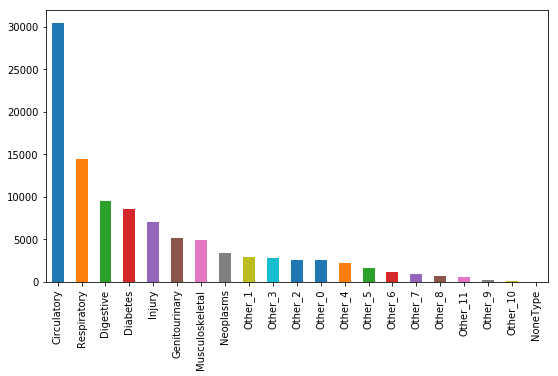

In [18]:
diag_1 = drop_data['diag_1'].copy()
diag_1 = clean_diag(diag_1)
_ = diag_1.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

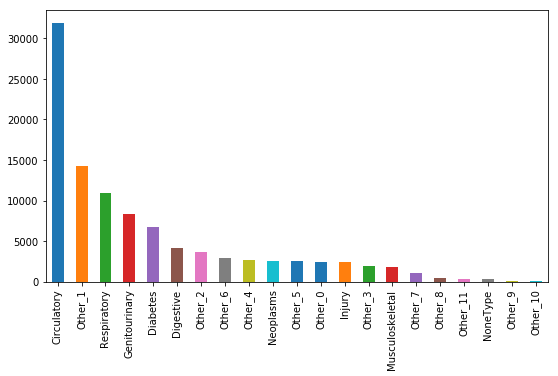

In [19]:
diag_2 = drop_data['diag_2'].copy()
diag_2 = clean_diag(diag_2)
_ = diag_2.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

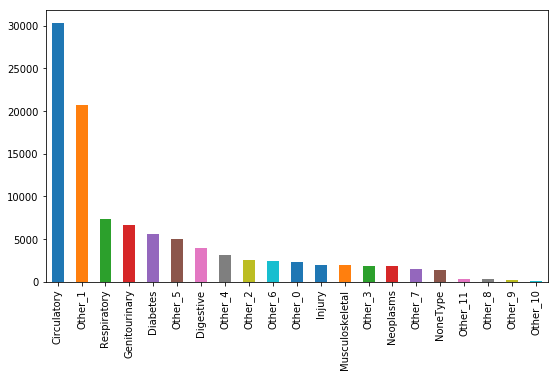

In [20]:
diag_3 = drop_data['diag_3'].copy()
diag_3 = clean_diag(diag_3)
_ = diag_3.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

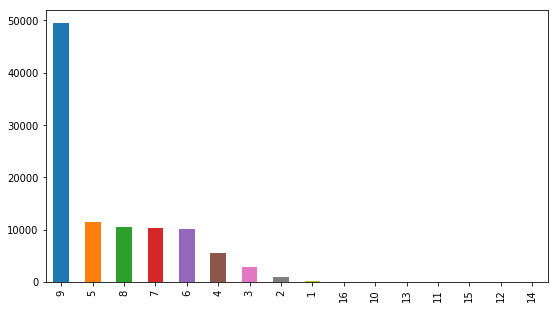

In [22]:
# <=4 5-8 9 >=10
num_diagnoses = drop_data['number_diagnoses']
_ = num_diagnoses.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

Largest Count -> 0.8035886248845391


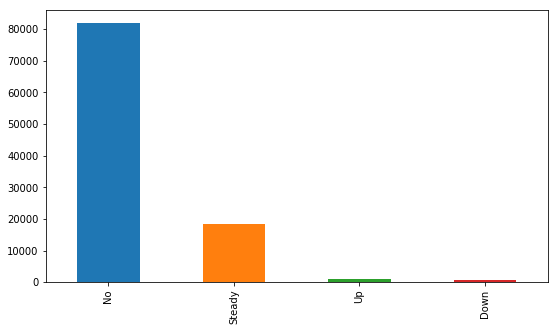

In [40]:
max_glu_serum = drop_data['max_glu_serum']
_ = max_glu_serum.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

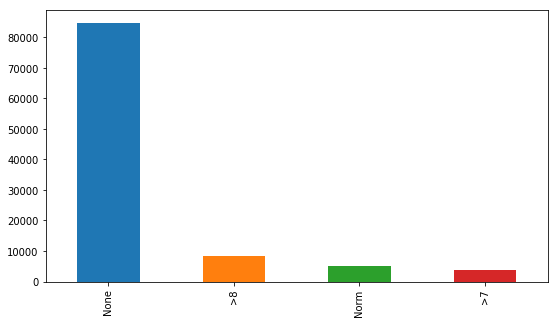

In [26]:
A1c_result = drop_data['A1Cresult']
_ = A1c_result.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

In [48]:
def medication_feature(key):
    medication = drop_data[key]
    _ = medication.value_counts()
    print('Total Item ->', len(medication))
    print('Largest Count ->', _[0])
    print('Largest Percent ->', _[0]/len(medication))
    _.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

Total Item -> 101766
Largest Count -> 81778
Largest Percent -> 0.8035886248845391


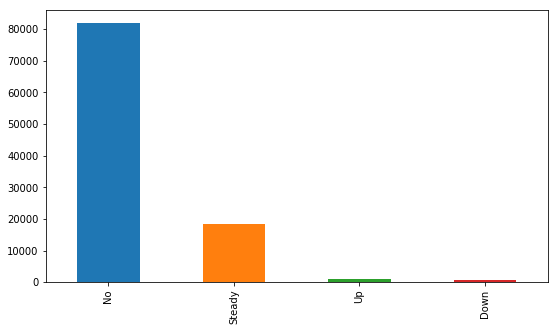

In [49]:
medication_feature('metformin')

Total Item -> 101766
Largest Count -> 100227
Largest Percent -> 0.9848770709274217


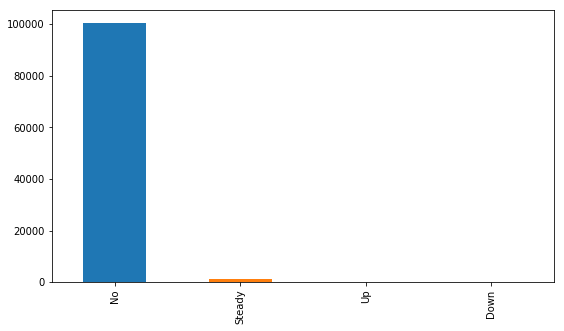

In [50]:
medication_feature('repaglinide')

Total Item -> 101766
Largest Count -> 101063
Largest Percent -> 0.9930919953619087


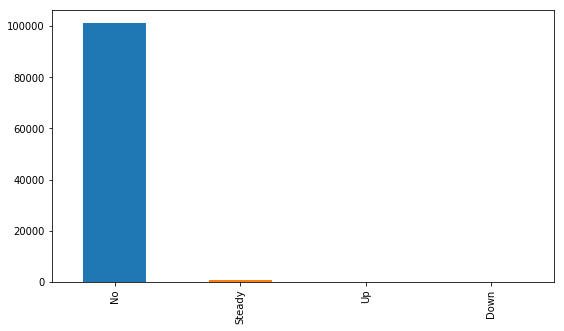

In [51]:
medication_feature('nateglinide')

Total Item -> 101766
Largest Count -> 101680
Largest Percent -> 0.9991549240414284


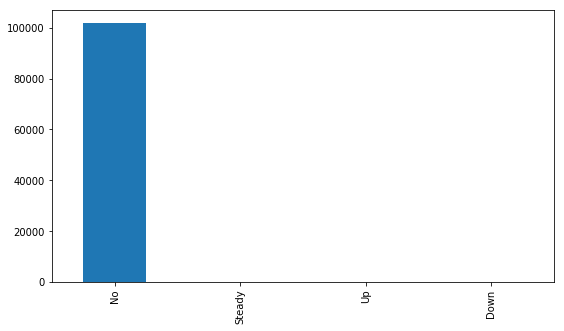

In [52]:
medication_feature('chlorpropamide')

Total Item -> 101766
Largest Count -> 96575
Largest Percent -> 0.9489908220820313


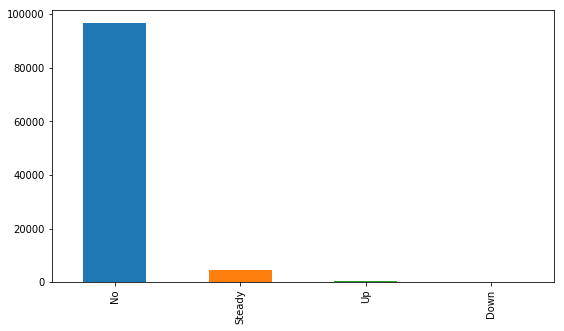

In [53]:
medication_feature('glimepiride')

Total Item -> 101766
Largest Count -> 101765
Largest Percent -> 0.9999901735353655


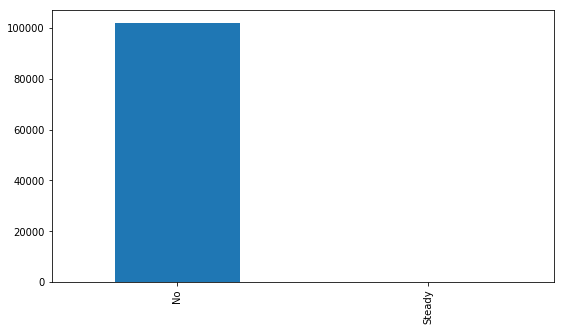

In [54]:
medication_feature('acetohexamide')

Total Item -> 101766
Largest Count -> 89080
Largest Percent -> 0.8753414696460508


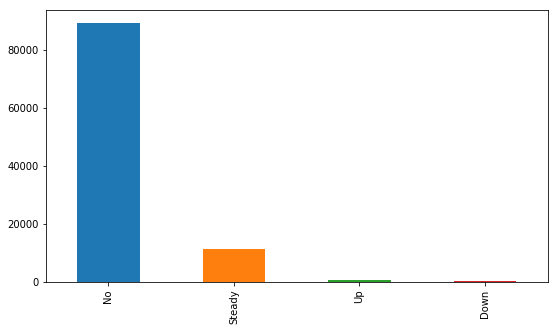

In [55]:
medication_feature('glipizide')

Total Item -> 101766
Largest Count -> 91116
Largest Percent -> 0.8953481516420022


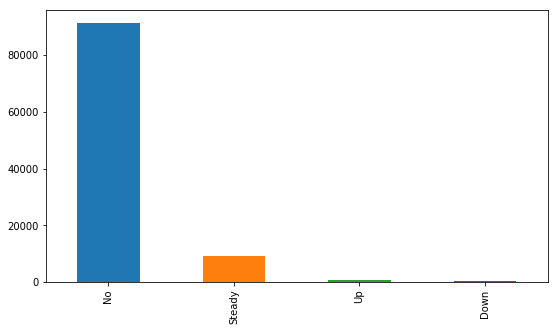

In [56]:
medication_feature('glyburide')

Total Item -> 101766
Largest Count -> 101743
Largest Percent -> 0.9997739913134053


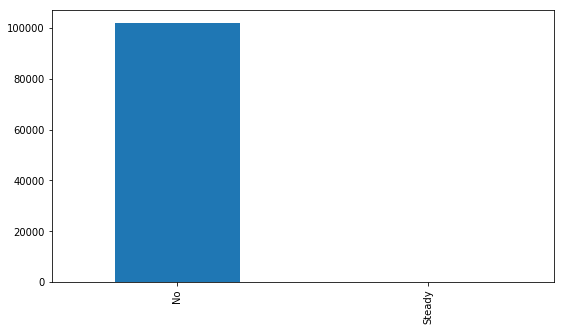

In [57]:
medication_feature('tolbutamide')

Total Item -> 101766
Largest Count -> 94438
Largest Percent -> 0.9279916671579899


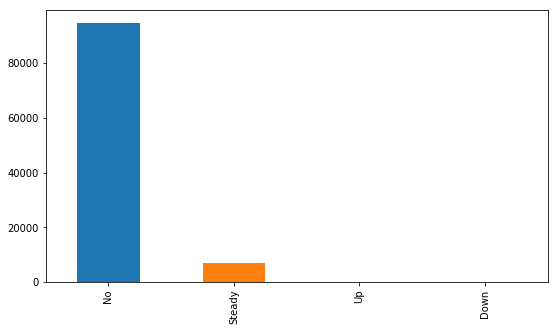

In [59]:
medication_feature('pioglitazone')

Total Item -> 101766
Largest Count -> 95401
Largest Percent -> 0.9374545526010651


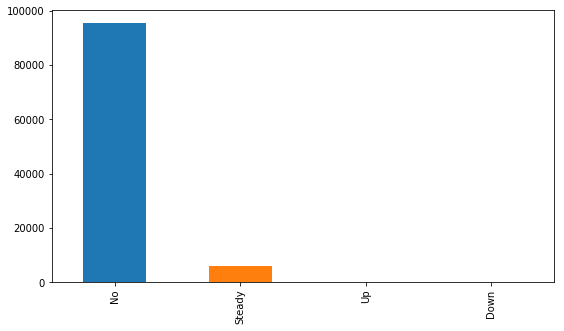

In [60]:
medication_feature('rosiglitazone')

Total Item -> 101766
Largest Count -> 101458
Largest Percent -> 0.9969734488925575


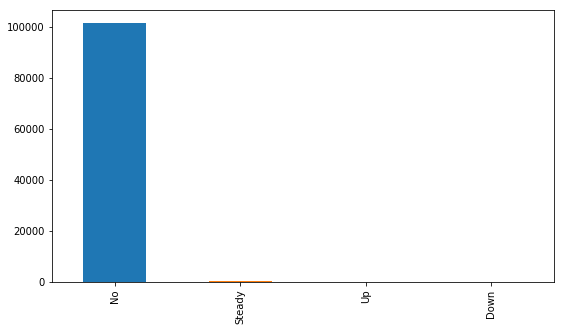

In [61]:
medication_feature('acarbose')

Total Item -> 101766
Largest Count -> 101728
Largest Percent -> 0.999626594343887


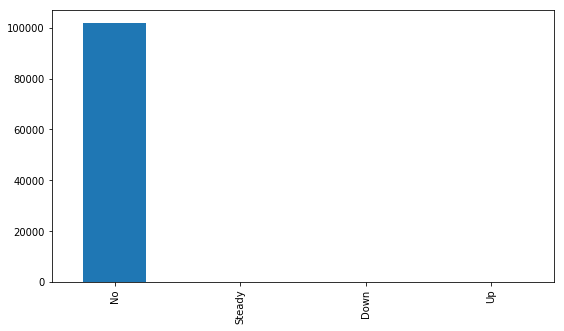

In [62]:
medication_feature('miglitol')

Total Item -> 101766
Largest Count -> 101763
Largest Percent -> 0.9999705206060964


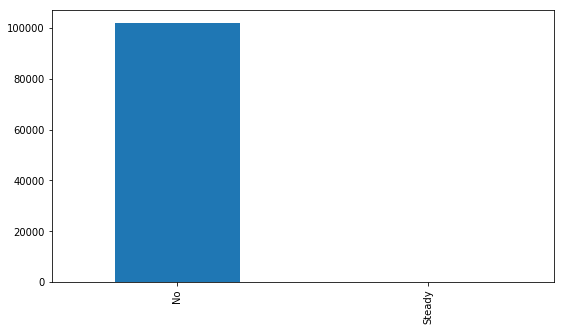

In [63]:
medication_feature('troglitazone')

Total Item -> 101766
Largest Count -> 101727
Largest Percent -> 0.9996167678792524


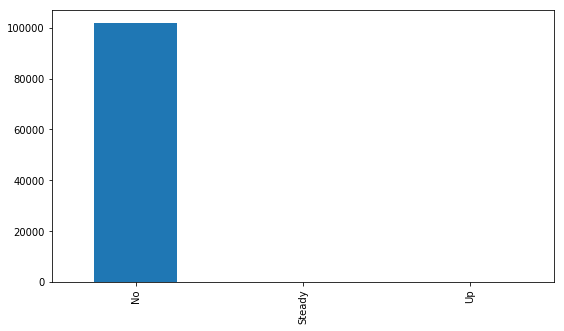

In [64]:
medication_feature('tolazamide')

Total Item -> 101766
Largest Count -> 101766
Largest Percent -> 1.0


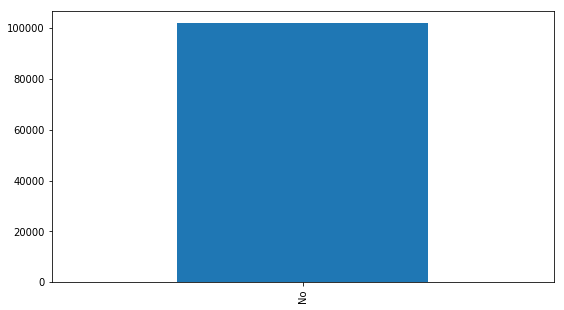

In [65]:
medication_feature('examide')

Total Item -> 101766
Largest Count -> 101766
Largest Percent -> 1.0


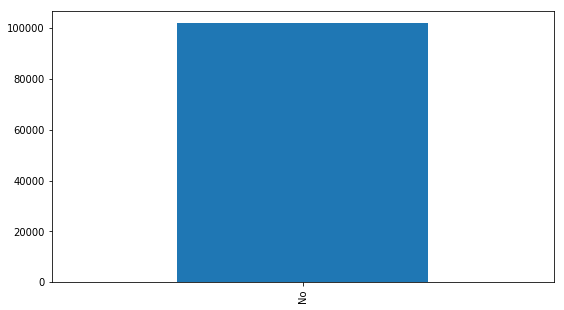

In [66]:
medication_feature('citoglipton')

Total Item -> 101766
Largest Count -> 47383
Largest Percent -> 0.46560737377906175


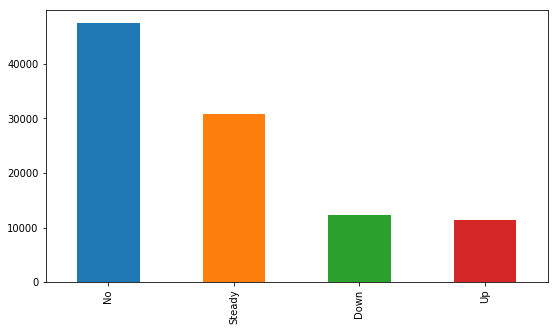

In [67]:
medication_feature('insulin')

Total Item -> 101766
Largest Count -> 101060
Largest Percent -> 0.993062515968005


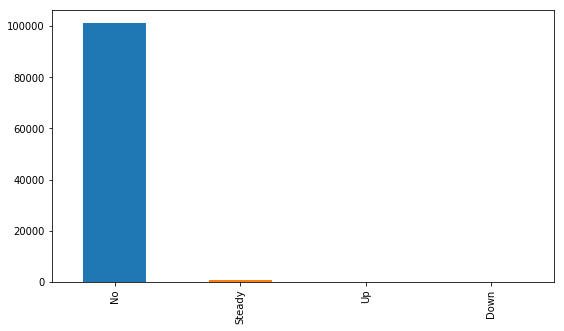

In [68]:
medication_feature('glyburide-metformin')

Total Item -> 101766
Largest Count -> 101753
Largest Percent -> 0.9998722559597508


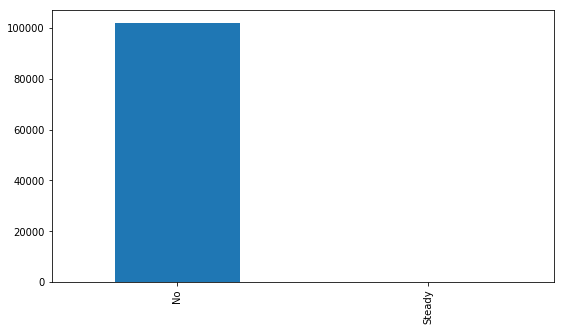

In [69]:
medication_feature('glipizide-metformin')

Total Item -> 101766
Largest Count -> 101765
Largest Percent -> 0.9999901735353655


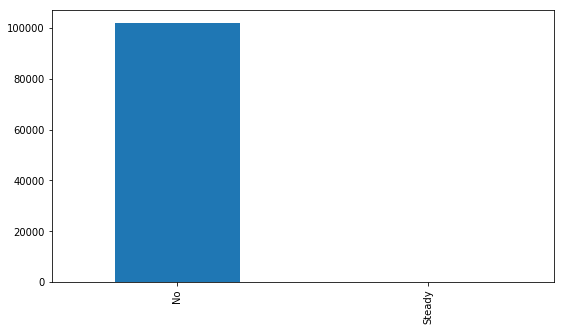

In [70]:
medication_feature('glimepiride-pioglitazone')

Total Item -> 101766
Largest Count -> 101764
Largest Percent -> 0.9999803470707309


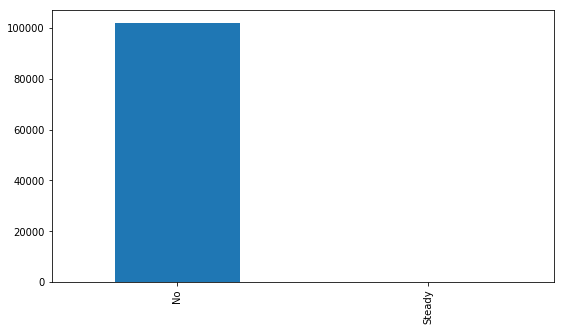

In [71]:
medication_feature('metformin-rosiglitazone')

Total Item -> 101766
Largest Count -> 101765
Largest Percent -> 0.9999901735353655


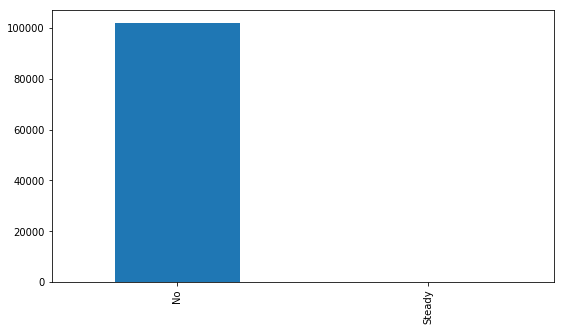

In [72]:
medication_feature('metformin-pioglitazone')

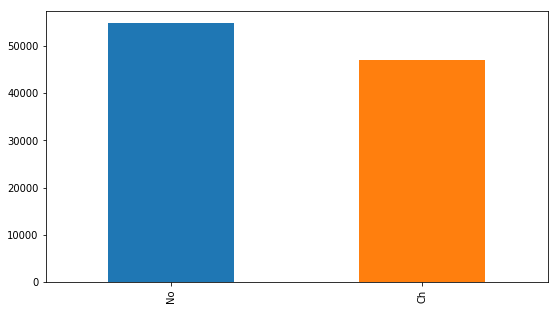

In [9]:
Change = drop_data['change']
_ = Change.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

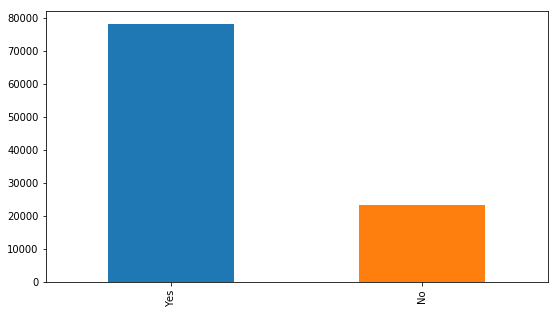

In [6]:
Diabetes_medication = drop_data['diabetesMed']
_ = Diabetes_medication.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

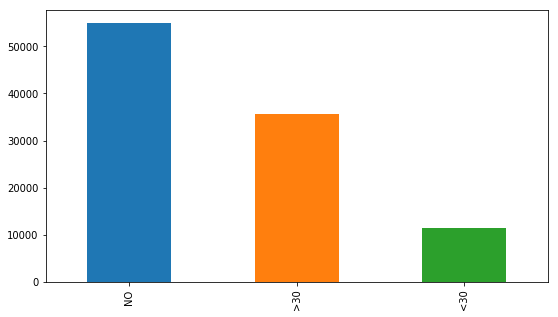

In [11]:
Readmitted = drop_data['readmitted']
_ = Readmitted.value_counts()
_.plot(kind='bar', figsize=(0.18 * len(_) if len(_) > 50 else 9, 5))

In [12]:
Readmitted = Readmitted.replace({'NO':0, '>30':1, '<30':2})
Change = Change.replace({'No':0, 'Ch':1})

In [13]:
frame = pd.DataFrame()
frame['change'] = Change
frame['readmitted'] = Readmitted
# frame.plot.scatter(x='change', y='readmitted')
# plt.pcolor(frame)

In [14]:
print(len(frame))
for i in range(2):
    for j in range(3):
        print('Frame Size in Change = %d & Readmitted = %d ->'%(i, j), len(frame[(frame.change == i) & (frame.readmitted == j)]))

101766
Frame Size in Change = 0 & Readmitted = 0 -> 30683
Frame Size in Change = 0 & Readmitted = 1 -> 18273
Frame Size in Change = 0 & Readmitted = 2 -> 5799
Frame Size in Change = 1 & Readmitted = 0 -> 24181
Frame Size in Change = 1 & Readmitted = 1 -> 17272
Frame Size in Change = 1 & Readmitted = 2 -> 5558


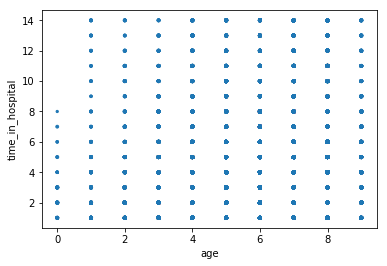

In [7]:
frame = pd.DataFrame()
age = drop_data['age'].copy()
time_in_hospital = drop_data['time_in_hospital'].copy()
age = age.apply(lambda x: int(x[1]))
frame['age'] = age
frame['time_in_hospital'] = time_in_hospital
frame.plot.scatter(x='age', y='time_in_hospital')
# drop_data.plot.scatter(x='age', y='time_in_hospital')

In [9]:
print(len(frame))
for i in range(10):
    for j in range(1, 15):
        print('Frame Size in Age = %d & Hospital = %d ->'%(i, j), len(frame[(frame.age == i) & (frame.time_in_hospital == j)]))
    print()

101766
Frame Size in Age = 0 & Hospital = 1 -> 33
Frame Size in Age = 0 & Hospital = 2 -> 53
Frame Size in Age = 0 & Hospital = 3 -> 48
Frame Size in Age = 0 & Hospital = 4 -> 16
Frame Size in Age = 0 & Hospital = 5 -> 6
Frame Size in Age = 0 & Hospital = 6 -> 3
Frame Size in Age = 0 & Hospital = 7 -> 1
Frame Size in Age = 0 & Hospital = 8 -> 1
Frame Size in Age = 0 & Hospital = 9 -> 0
Frame Size in Age = 0 & Hospital = 10 -> 0
Frame Size in Age = 0 & Hospital = 11 -> 0
Frame Size in Age = 0 & Hospital = 12 -> 0
Frame Size in Age = 0 & Hospital = 13 -> 0
Frame Size in Age = 0 & Hospital = 14 -> 0

Frame Size in Age = 1 & Hospital = 1 -> 143
Frame Size in Age = 1 & Hospital = 2 -> 225
Frame Size in Age = 1 & Hospital = 3 -> 145
Frame Size in Age = 1 & Hospital = 4 -> 63
Frame Size in Age = 1 & Hospital = 5 -> 28
Frame Size in Age = 1 & Hospital = 6 -> 19
Frame Size in Age = 1 & Hospital = 7 -> 14
Frame Size in Age = 1 & Hospital = 8 -> 13
Frame Size in Age = 1 & Hospital = 9 -> 6
Frame 